# ANALISIS DE DATOS - TP


## Importar libs y datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
df = pd.read_csv('./dataset/Crimes_-_2024_20251103.csv', na_values='sin especificar', encoding='ISO-8859-1')

## Analisis preliminar de los datos

In [3]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13709672,JJ101940,12/31/2024 11:58:00 PM,014XX E 68TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,5,43,14,1186817.0,1860189.0,2024,11/02/2025 03:41:09 PM,41.771470,-87.590742,POINT (-87.59074212 41.771470188)
1,13707925,JJ100089,12/31/2024 11:56:00 PM,047XX S DR MARTIN LUTHER KING JR DR,1365,CRIMINAL TRESPASS,TO RESIDENCE,APARTMENT,True,True,...,3,38,26,1179661.0,1873623.0,2024,05/17/2025 03:40:52 PM,41.808501,-87.616563,POINT (-87.616562762 41.808500903)
2,13708038,JJ100035,12/31/2024 11:55:00 PM,077XX S CICERO AVE,0498,BATTERY,"AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...",HOTEL / MOTEL,False,True,...,18,70,04B,1145740.0,1853048.0,2024,11/02/2025 03:41:09 PM,41.752749,-87.741498,POINT (-87.741497836 41.752748627)
3,13709164,JJ101392,12/31/2024 11:53:00 PM,066XX S GREENWOOD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,20,42,14,1184362.0,1861188.0,2024,11/02/2025 03:41:09 PM,41.774269,-87.599710,POINT (-87.599709962 41.774269351)
4,13707823,JJ100020,12/31/2024 11:50:00 PM,012XX N MENARD AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,29,25,08B,1137458.0,1907694.0,2024,05/17/2025 03:40:52 PM,41.902858,-87.770537,POINT (-87.770536741 41.902858242)


In [4]:
print(df.dtypes)

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                      int64
Community Area            int64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object


In [5]:
df.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.587920e+05,258792.000000,258792.000000,258792.000000,258792.000000,2.575580e+05,2.575580e+05,258792.0,257558.000000,257558.000000
mean,1.349158e+07,1157.192931,11.342070,23.187270,36.181563,1.165282e+06,1.887736e+06,2024.0,41.847531,-87.668942
std,6.534456e+05,709.321354,7.087907,13.949852,21.608848,1.616069e+04,3.153836e+04,0.0,0.086724,0.058847
min,2.793200e+04,111.000000,1.000000,1.000000,1.000000,1.092647e+06,1.813897e+06,2024.0,41.644590,-87.934567
25%,1.342528e+07,533.000000,5.000000,10.000000,22.000000,1.154006e+06,1.860556e+06,2024.0,41.772690,-87.709893
50%,1.352165e+07,1034.000000,10.000000,23.000000,32.000000,1.167128e+06,1.894416e+06,2024.0,41.866084,-87.661855
75%,1.361702e+07,1732.000000,17.000000,34.000000,53.000000,1.176639e+06,1.910460e+06,2024.0,41.910074,-87.627352
max,1.401602e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951493e+06,2024.0,42.022548,-87.524531


In [10]:
df.shape

(258792, 22)

In [11]:
# Contar la proporción de valores nulos en cada columna
df.isna().sum()  

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description    1089
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                       0
Community Area             0
FBI Code                   0
X Coordinate            1234
Y Coordinate            1234
Year                       0
Updated On                 0
Latitude                1234
Longitude               1234
Location                1234
dtype: int64

<Axes: >

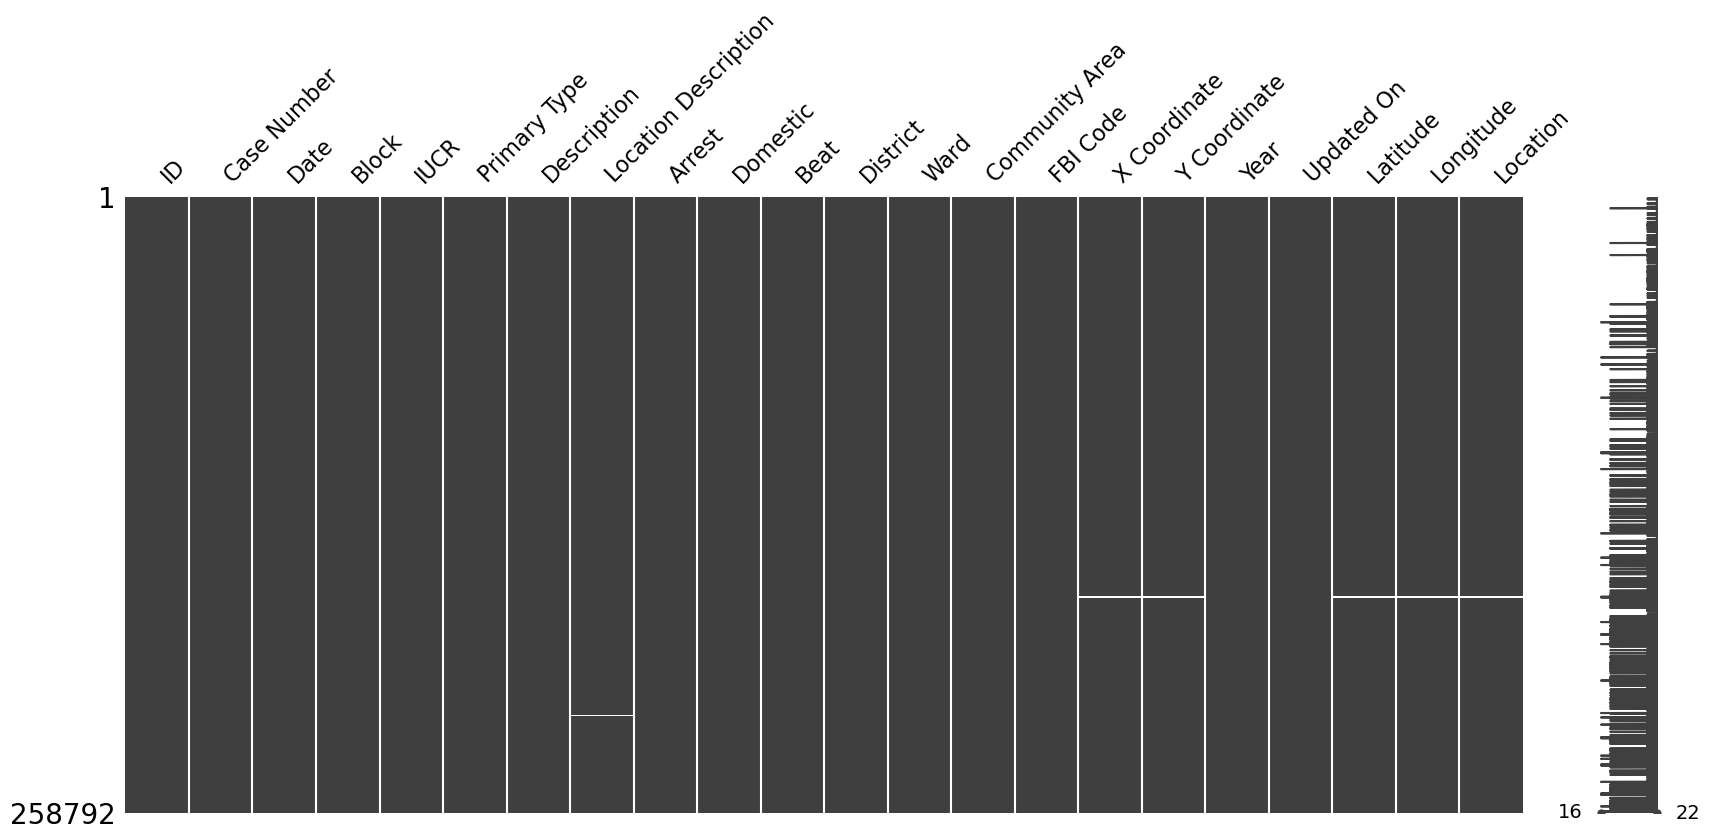

In [16]:
# Matriz de valores faltantes
msno.matrix(df, figsize=(20,8))

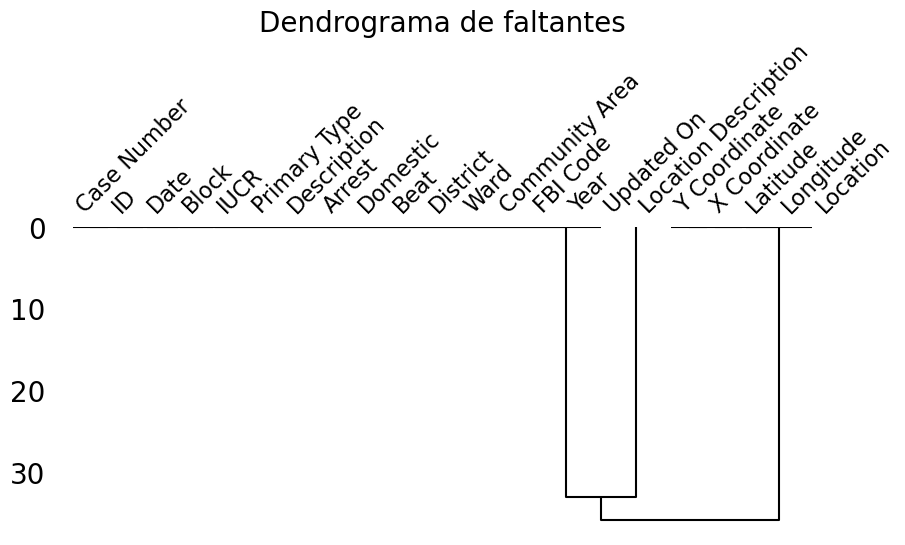

In [17]:
msno.dendrogram(df, figsize=(10,4))
plt.title('Dendrograma de faltantes', fontsize=20)
plt.show()

In [18]:
df['Primary Type'].unique()

array(['CRIMINAL DAMAGE', 'CRIMINAL TRESPASS', 'BATTERY',
       'MOTOR VEHICLE THEFT', 'OTHER OFFENSE', 'WEAPONS VIOLATION',
       'ASSAULT', 'THEFT', 'DECEPTIVE PRACTICE',
       'CRIMINAL SEXUAL ASSAULT', 'ROBBERY',
       'CONCEALED CARRY LICENSE VIOLATION', 'BURGLARY', 'STALKING',
       'NARCOTICS', 'LIQUOR LAW VIOLATION', 'OFFENSE INVOLVING CHILDREN',
       'KIDNAPPING', 'HOMICIDE', 'ARSON', 'SEX OFFENSE',
       'INTERFERENCE WITH PUBLIC OFFICER', 'PUBLIC PEACE VIOLATION',
       'INTIMIDATION', 'GAMBLING', 'PROSTITUTION', 'OBSCENITY',
       'PUBLIC INDECENCY', 'HUMAN TRAFFICKING', 'NON-CRIMINAL',
       'OTHER NARCOTIC VIOLATION'], dtype=object)

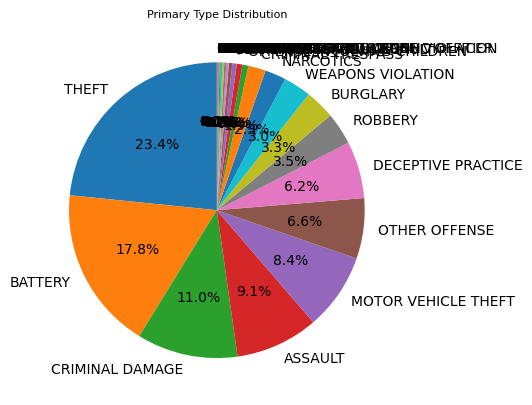

In [10]:
category_counts = df['Primary Type'].value_counts()
category_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Primary Type Distribution', fontsize=8)
plt.ylabel('') # Remove the default 'Category' label on the y-axis
plt.show()

In [19]:
df['Location Description'].unique()

array(['APARTMENT', 'HOTEL / MOTEL', 'STREET', 'SIDEWALK', 'CTA BUS',
       'RESIDENCE', 'BAR OR TAVERN', 'SMALL RETAIL STORE',
       'VEHICLE NON-COMMERCIAL', 'ALLEY', 'COMMERCIAL / BUSINESS OFFICE',
       'PARKING LOT / GARAGE (NON RESIDENTIAL)', 'VACANT LOT / LAND',
       'CONVENIENCE STORE', 'POLICE FACILITY / VEHICLE PARKING LOT',
       'TAVERN / LIQUOR STORE', 'RESIDENCE - GARAGE',
       'RESIDENCE - YARD (FRONT / BACK)', 'RESTAURANT', 'PARK PROPERTY',
       'DRUG STORE', 'RESIDENCE - PORCH / HALLWAY', 'CHA APARTMENT',
       'CTA PLATFORM', 'CTA TRAIN',
       'AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA',
       'AIRPORT PARKING LOT', 'HOSPITAL BUILDING / GROUNDS',
       'MEDICAL / DENTAL OFFICE', 'CTA BUS STOP', 'DEPARTMENT STORE',
       'GAS STATION', 'OTHER (SPECIFY)', 'NURSING / RETIREMENT HOME',
       'DRIVEWAY - RESIDENTIAL', 'GOVERNMENT BUILDING / PROPERTY',
       'GROCERY FOOD STORE', 'CHA HALLWAY / STAIRWELL / ELEVATOR',
       'ABANDONED BUILDING', 'WARE

In [ ]:
df['Description'].unique()

array(['TO PROPERTY', 'TO RESIDENCE',
       'AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SERIOUS INJURY',
       'TO VEHICLE', 'SIMPLE', 'DOMESTIC BATTERY SIMPLE',
       'TO CITY OF CHICAGO PROPERTY', 'AUTOMOBILE',
       'HARASSMENT BY TELEPHONE', 'UNLAWFUL POSSESSION - HANDGUN',
       'AGGRAVATED - HANDGUN', '$500 AND UNDER', 'ILLEGAL USE CASH CARD',
       'UNLAWFUL USE / SALE OF AIR RIFLE', 'NON-AGGRAVATED', 'OVER $500',
       'FRAUD OR CONFIDENCE GAME',
       'AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MINOR INJURY',
       'ARMED - KNIFE / CUTTING INSTRUMENT',
       'AGGRAVATED POLICE OFFICER - HANDS, FISTS, FEET, NO INJURY',
       'GUN OFFENDER - ANNUAL REGISTRATION',
       'ARMED WHILE UNDER THE INFLUENCE', 'UNLAWFUL ENTRY',
       'THEFT OF LABOR / SERVICES', 'AGGRAVATED - OTHER DANGEROUS WEAPON',
       'RECKLESS FIREARM DISCHARGE', 'HARASSMENT BY ELECTRONIC MEANS',
       'POSSESS - BARBITURATES',
       'AGGRAVATED - KNIFE / CUTTING INSTRUMENT',
       'LIQUOR LICEN

In [6]:
df['FBI Code'].unique()

array(['14', '26', '04B', '08B', '07', '15', '08A', '06', '11', '02',
       '04A', '03', '05', '18', '22', '17', '01A', '10', '09', '24', '13',
       '20', '19', '16', '12', '01B'], dtype=object)

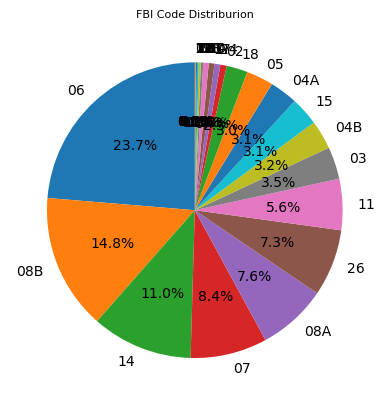

In [11]:
fbi_category_counts = df['FBI Code'].value_counts()
fbi_category_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('FBI Code Distriburion', fontsize=8)
plt.ylabel('') # Remove the default 'Category' label on the y-axis
plt.show()

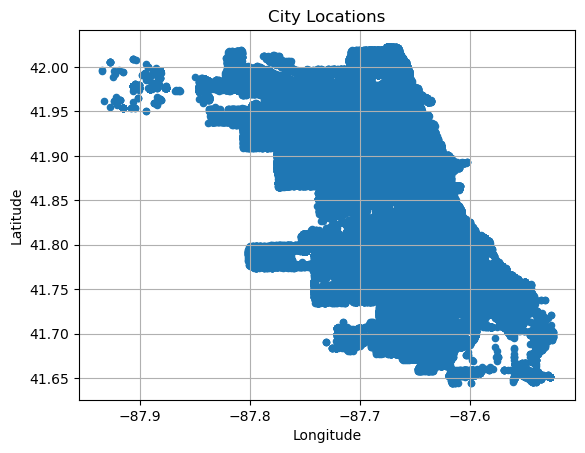

In [13]:
df.plot.scatter(x='Longitude', y='Latitude', title='City Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

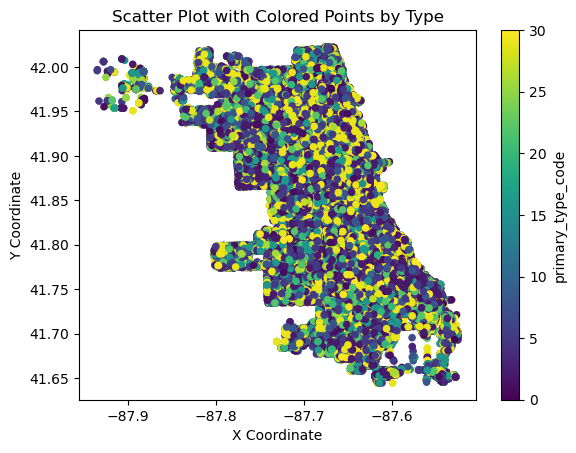

In [19]:
fig, ax = plt.subplots()
df['primary_type_code'] = df['Primary Type'].astype('category').cat.codes
df.plot.scatter(x='Longitude', y='Latitude', c='primary_type_code', cmap='viridis', ax=ax)

# Add a title and labels for clarity
ax.set_title('Scatter Plot with Colored Points by Type')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')

# Display the plot
plt.show()